In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11_tangram') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

In [3]:
sdata.table.var
# capitalize index
sdata.table.var.index = sdata.table.var.index.str.capitalize()
sdata.table.var 

n_cells_by_counts  mean_counts  log1p_mean_counts  \
Acta2                   317     0.382063           0.323577   
Adamtsl2                515     0.146695           0.136884   
Adgre1                  809     0.167326           0.154716   
Adgrg6                  367     0.070484           0.068111   
Atp6v0d2                661     0.063074           0.061164   
...                     ...          ...                ...   
Vwf                     500     0.381389           0.323090   
Wnt2                    544     0.069474           0.067167   
Wnt9b                   119     0.021389           0.021164   
Wt1                      74     0.012547           0.012469   
Xcr1                    115     0.017853           0.017695   

          pct_dropout_by_counts  total_counts  log1p_total_counts  n_cells  \
Acta2                 97.330526          4537            8.420242      302   
Adamtsl2              95.663158          1742            7.463363      506   
Adgre1                93.187368          1987            7.594884      797   
Adgrg6                96.909474           837            6.731018      360   
Atp6v0d2              94.433684           749            6.620073      658   
...                         ...           ...                 ...      ...   
Vwf                   95.789474          4529            8.418477      472   
Wnt2                  95.418947           825            6.716595      536   
Wnt9b                 98.997895           254            5.541264      114   
Wt1                   99.376842           149            5.010635       71   
Xcr1                  99.031579           212            5.361292      113   

              mean       std  sparsity  
Acta2     0.010009  0.087445  0.973103  
Adamtsl2  0.005403  0.035190  0.954934  
Adgre1    0.006263  0.029543  0.929017  
Adgrg6    0.002527  0.018310  0.967937  
Atp6v0d2  0.002155  0.011087  0.941397  
...            ...       ...       ...  
Vwf       0.011748  0.074048  0.957962  
Wnt2      0.002752  0.015097  0.952262  
Wnt9b     0.000865  0.011482  0.989847  
Wt1       0.000445  0.007818  0.993677  
Xcr1      0.000681  0.010076  0.989936  

[99 rows x 10 columns]

In [4]:
# UMAP for vizualization
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
n_neighb = 15
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15)

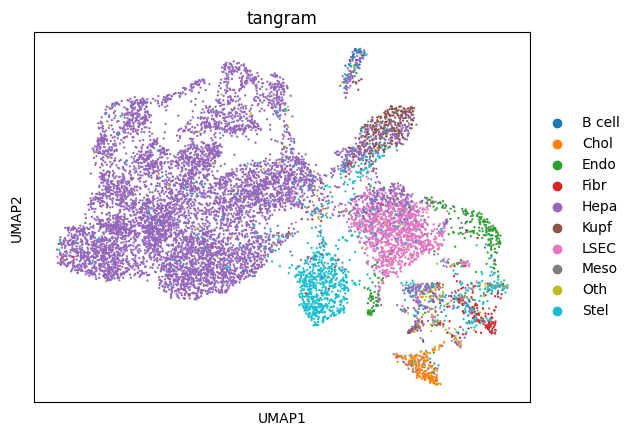

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
          tangram
B cell   0.382971
Chol     1.825793
Endo     2.449234
Fibr     1.612041
Hepa    68.453865
Kupf     2.903456
LSEC    10.732098
Meso     0.489847
Oth      1.407196
Stel     9.743498
categories: B cell, Chol, Endo, etc.
var_group_labels: hepa, hepa_chol_stel_fibr, hepa, etc.


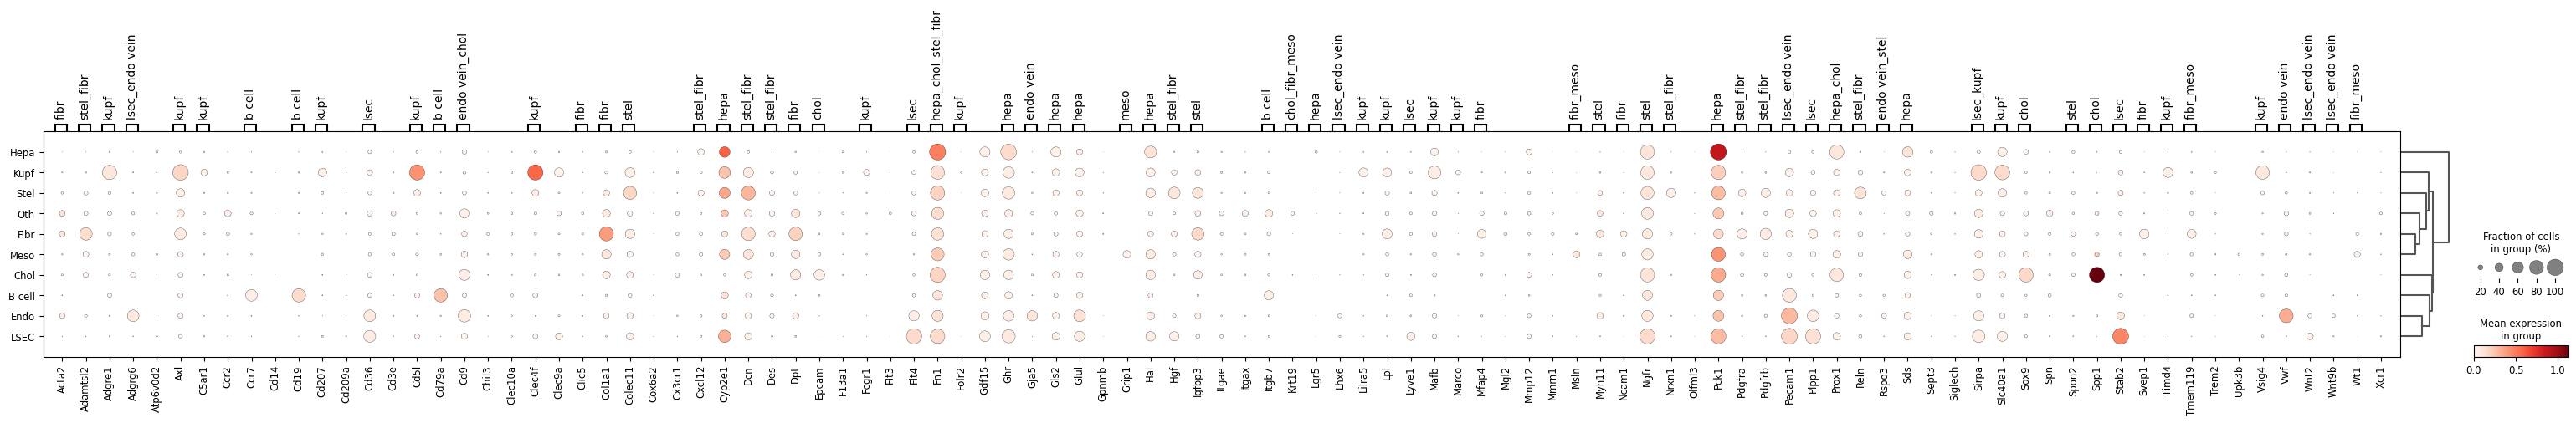

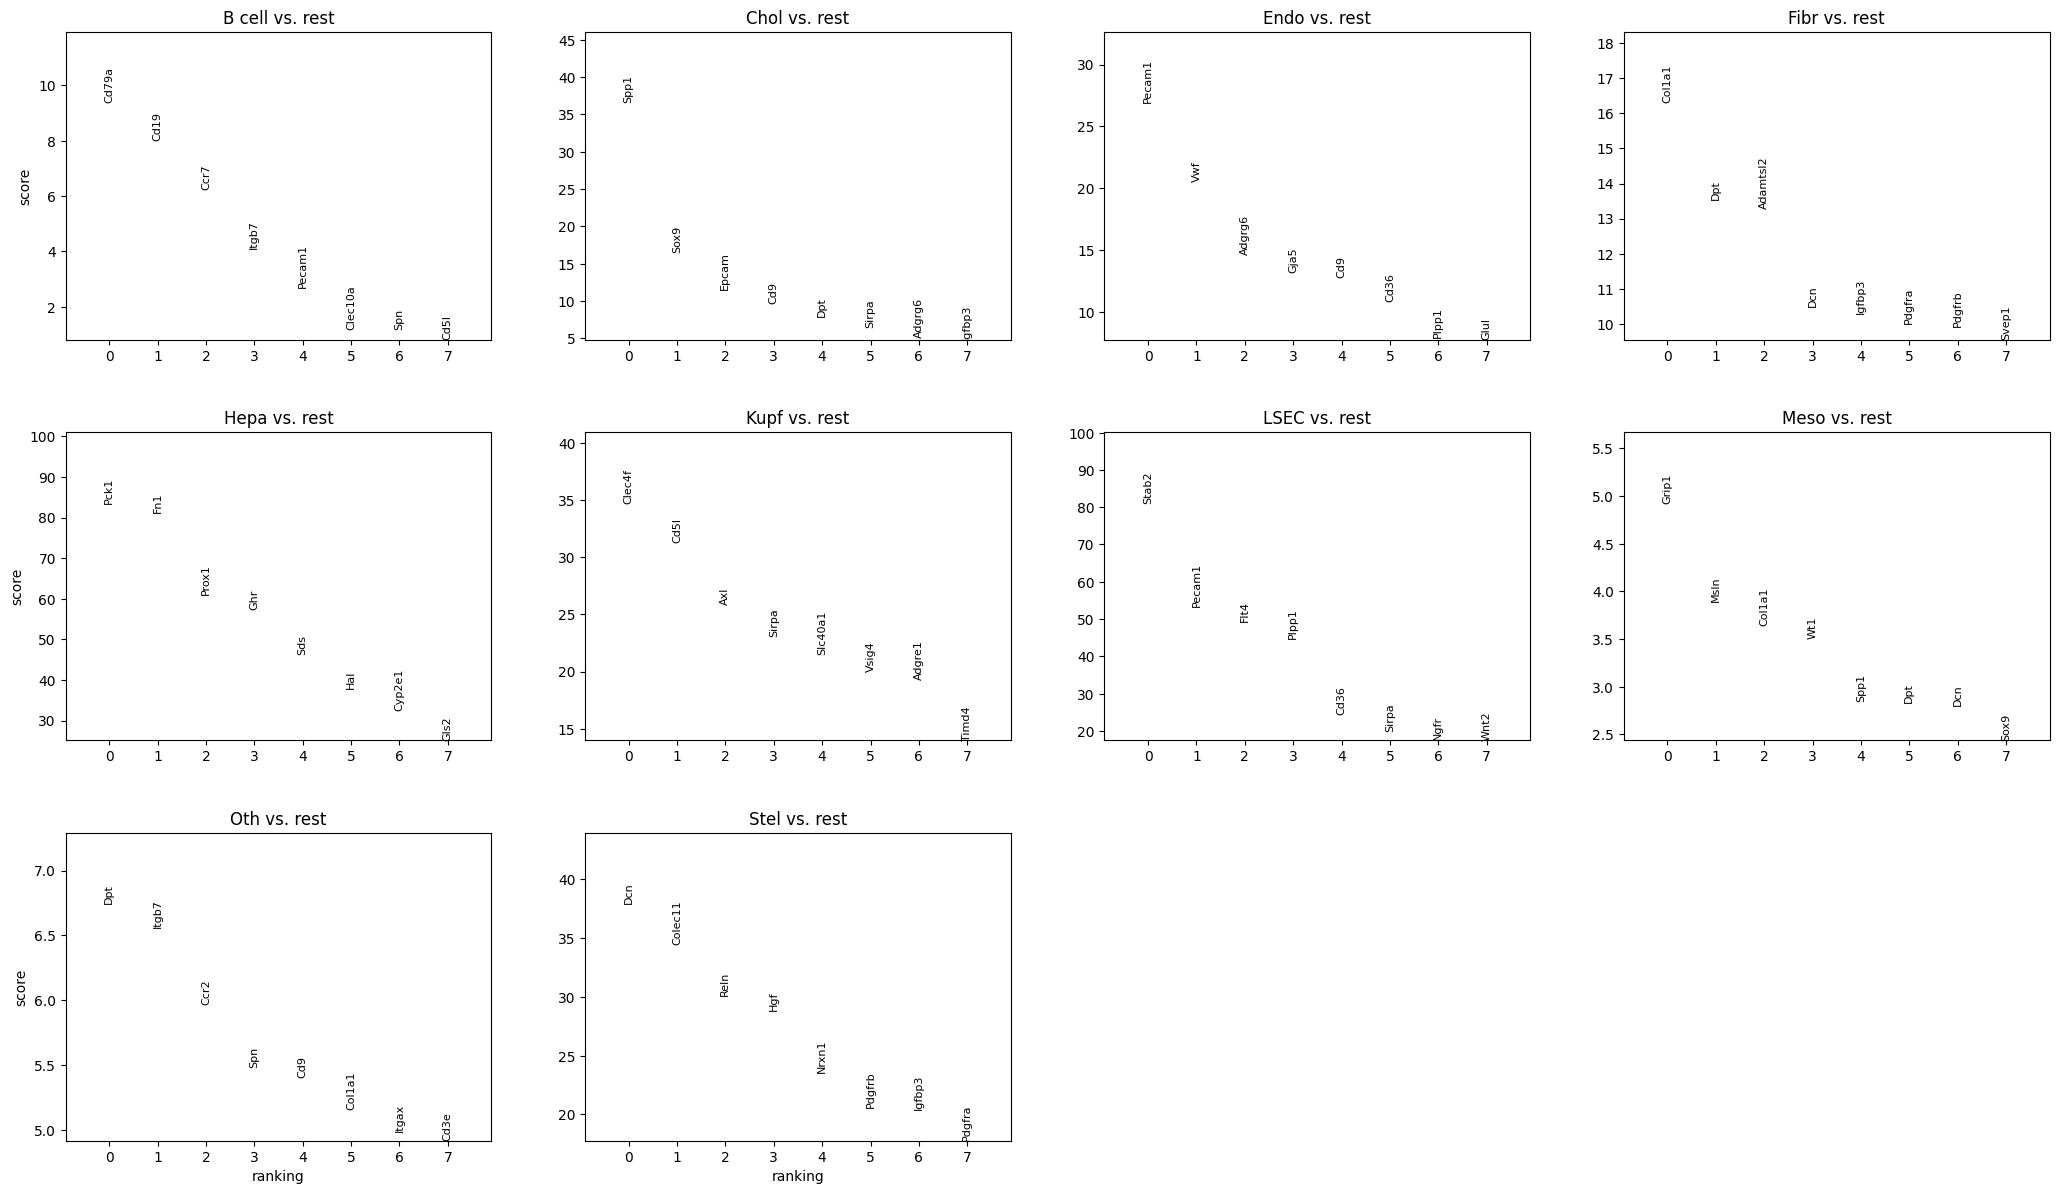

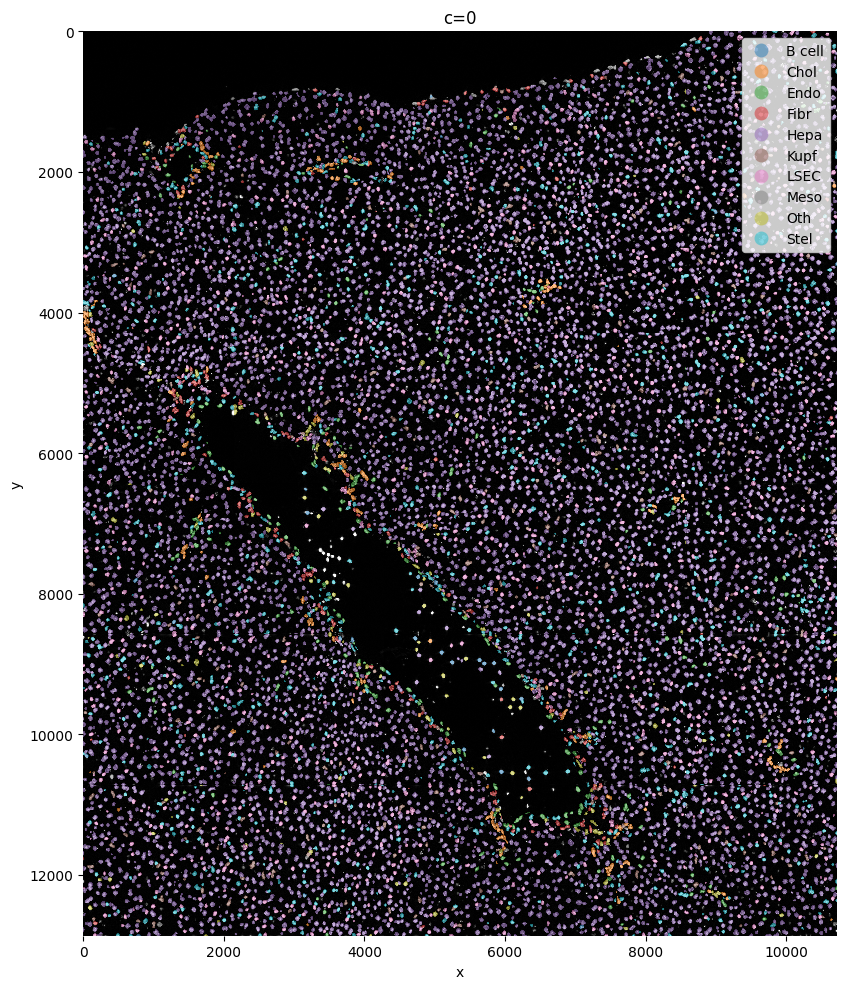

In [5]:
# Tangram cell mode
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
visualize_classification(sdata,'tangram','umap_23_15',path_mg,cell_type_annotation=True,plot_dot_plot=True,plot_rank_genes_groups=True,plot_image=True)

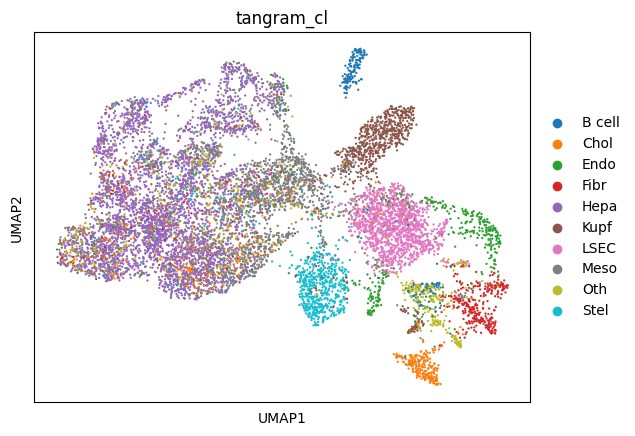

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
        tangram_cl
B cell    2.297827
Chol      5.869255
Endo      4.150338
Fibr      4.194870
Hepa     34.449590
Kupf      6.768792
LSEC     12.370859
Meso     16.788386
Oth       6.813324
Stel      6.296758
categories: B cell, Chol, Endo, etc.
var_group_labels: hepa, hepa_chol_stel_fibr, hepa, etc.


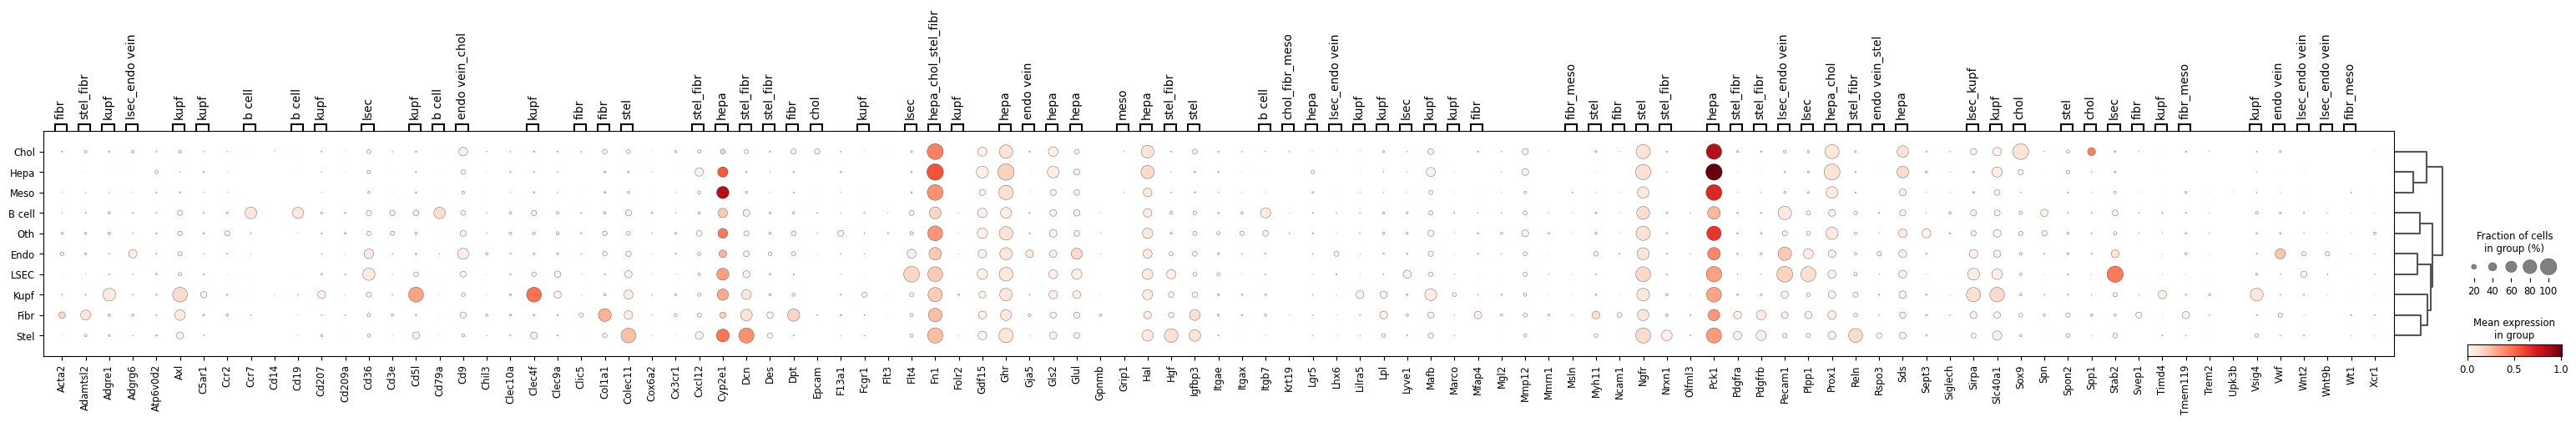

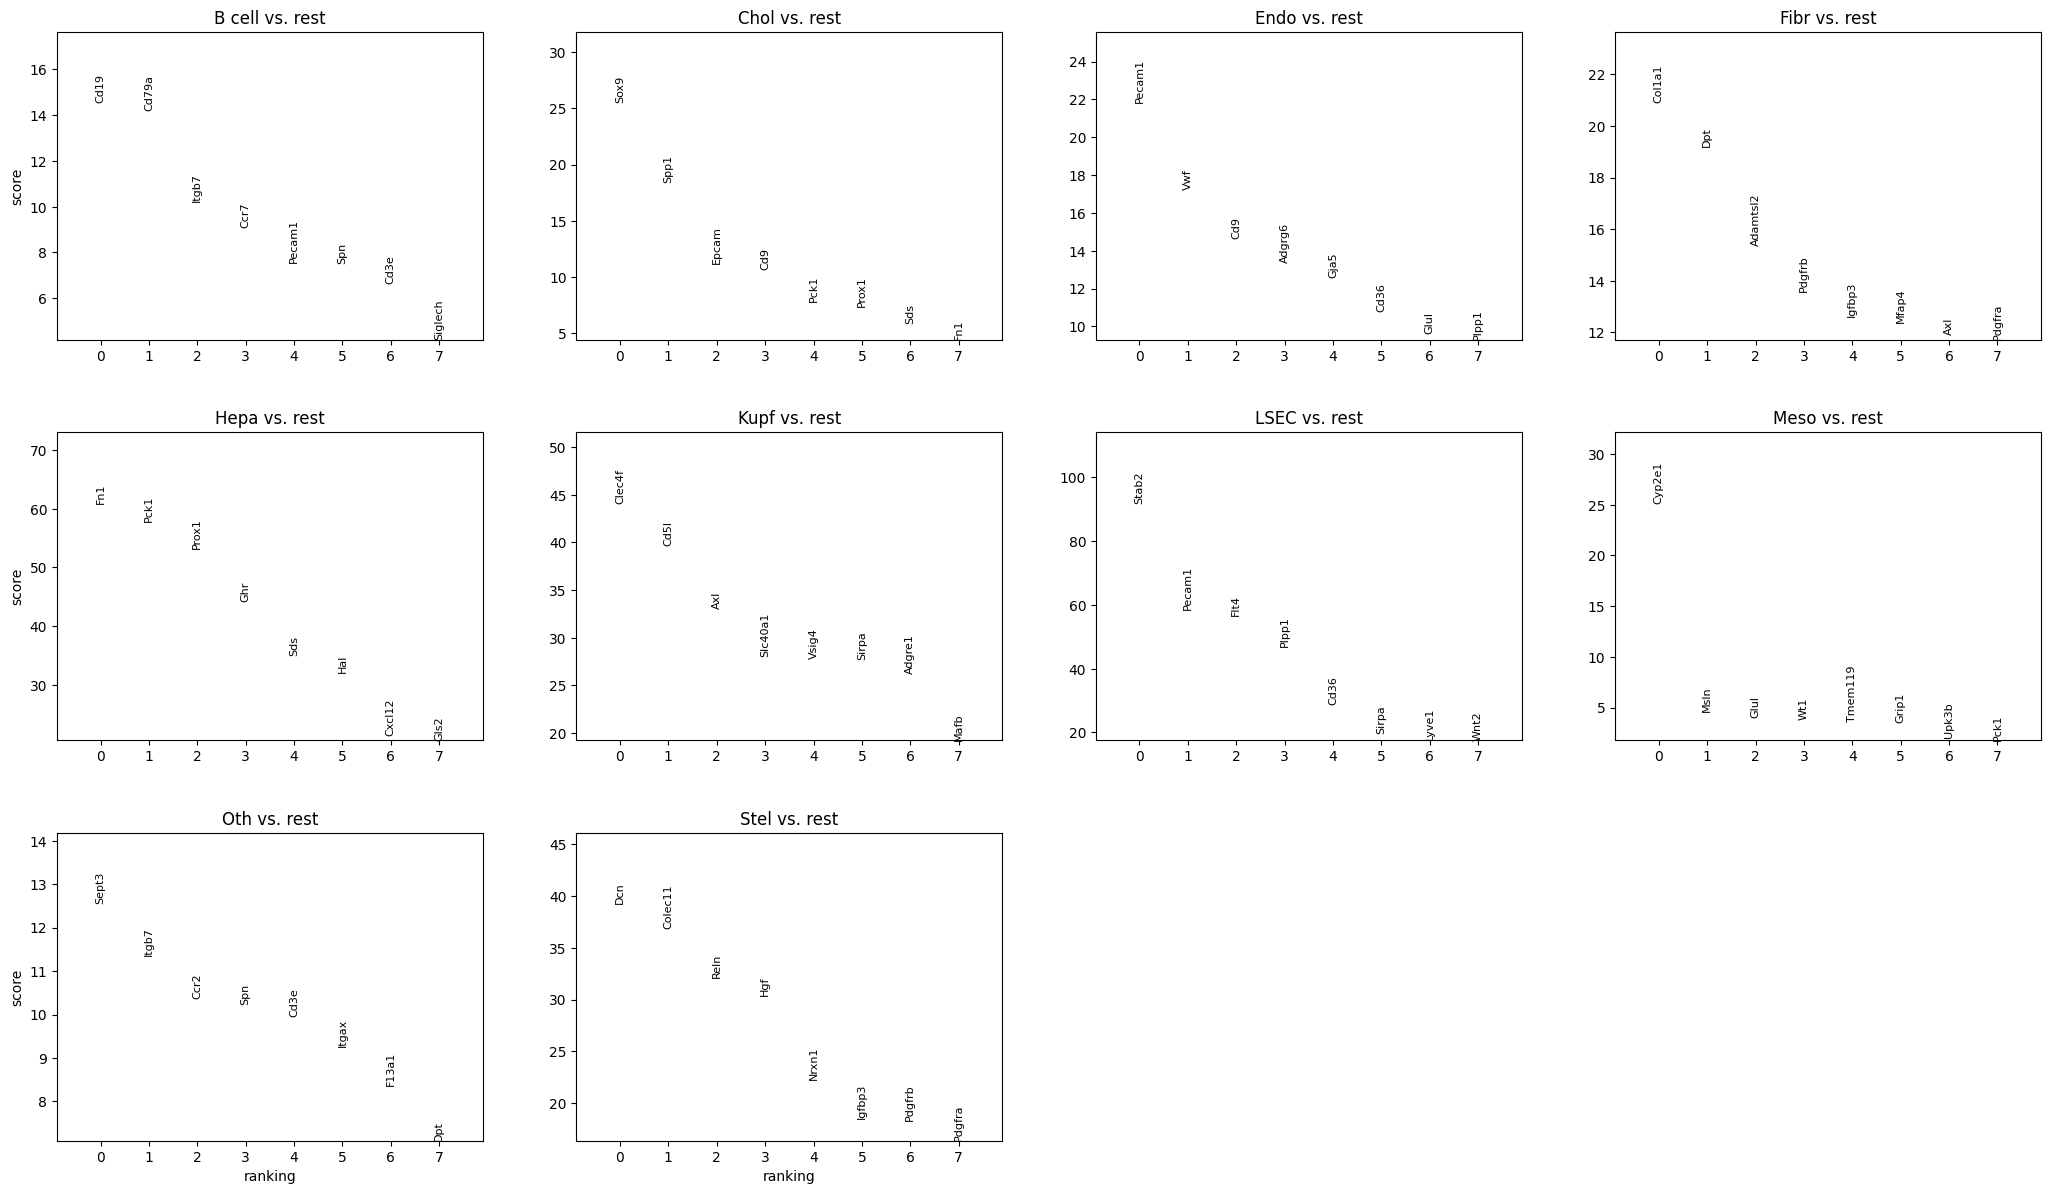

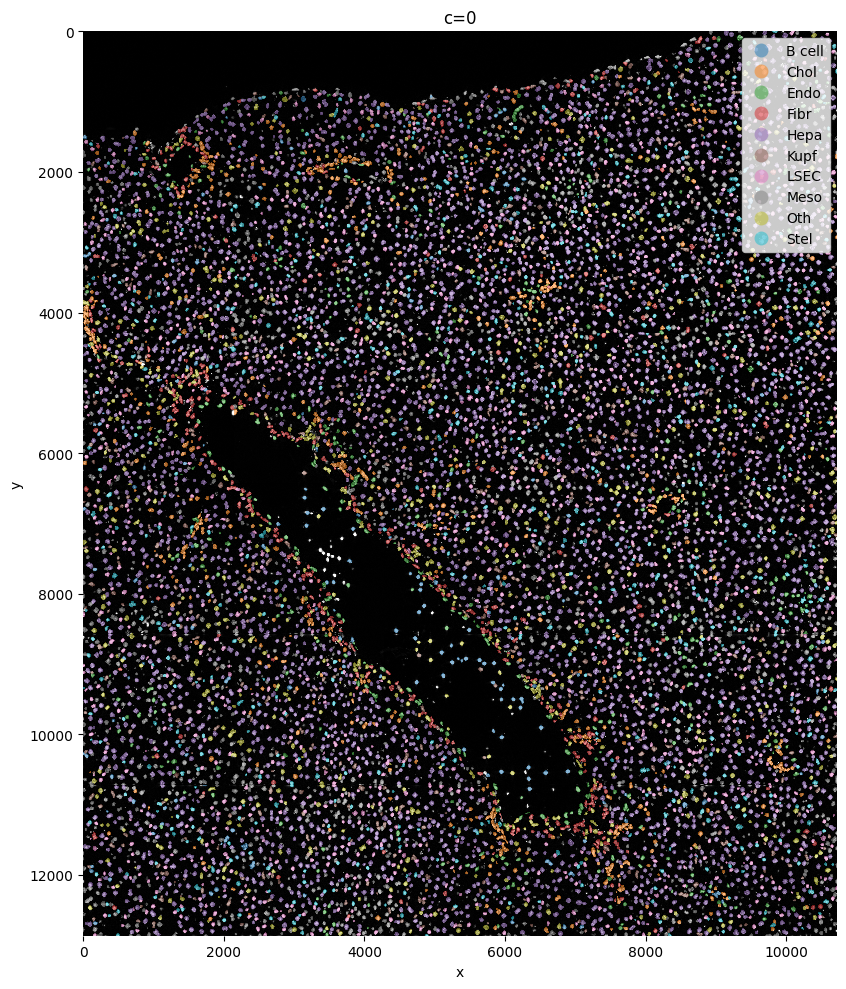

In [6]:
# Tangram cluster mode
visualize_classification(sdata,'tangram_cl','umap_23_15',path_mg,cell_type_annotation=True,plot_dot_plot=True,plot_rank_genes_groups=True,plot_image=True)
